# Jupyter Data Science Workflow

From Exploratory analysis to reproducible science

In [1]:
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [2]:
from urllib.request import urlretrieve

urlretrieve(URL, 'Fremont.csv')

('Fremont.csv', <http.client.HTTPMessage at 0x1bfe5fafc50>)

In [3]:
import pandas as pd

Fremont=pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)

Fremont.head(10)

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0
2012-10-03 05:00:00,10.0,21.0
2012-10-03 06:00:00,50.0,105.0
2012-10-03 07:00:00,95.0,257.0
2012-10-03 08:00:00,146.0,291.0


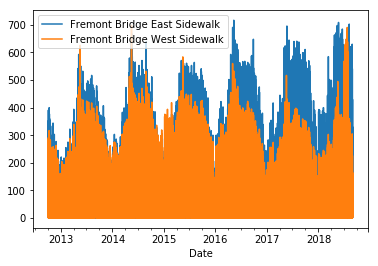

In [5]:
%matplotlib inline
Fremont.plot();

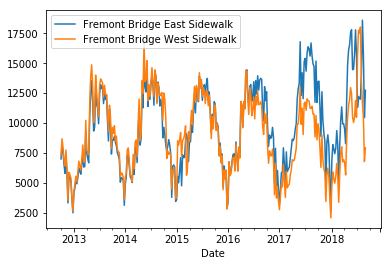

In [6]:
Fremont.resample('W').sum().plot(); #see the data weekly rather than hourly